In [1]:
import numpy as np
import cv2 as cv
import torch

import matplotlib.pyplot as plt

In [2]:
from unet import U_Net

In [3]:
img_name = 'satImage_085.png'
img = cv.imread('training/images/' + img_name)
groundtruth = cv.imread('training/groundtruth/' + img_name)

/tmp/ipykernel_409937/3076215641.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.imshow((groundtruth > 0).astype(np.float))


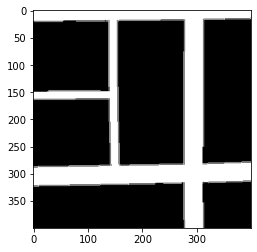

In [4]:
plt.imshow((groundtruth > 0).astype(np.float))

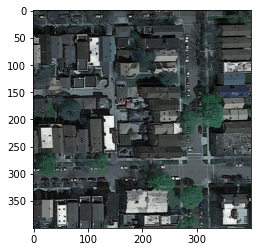

In [5]:
plt.imshow(img)

In [6]:
# model = resnet18()
model = U_Net()

In [7]:
model.load_state_dict(torch.load('model_4.pt', map_location='cpu'))

<All keys matched successfully>

In [8]:
img_transformed = torch.tensor(img).unsqueeze(0).permute(0, 3, 1, 2) / 255
# print(img_transformed)
output = model(img_transformed).squeeze().detach().numpy()

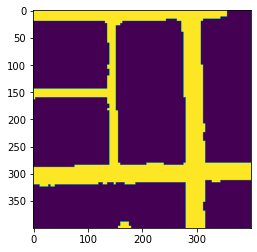

In [9]:
plt.imshow(output > 0.5)

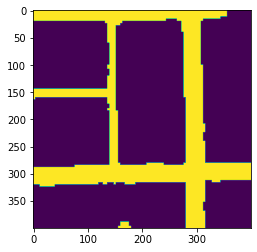

In [10]:
plt.imshow(cv.morphologyEx((output > 0.5).astype(np.uint8) * 255, cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_RECT, [5, 5])))

## Predict the test set images

In [11]:
test_set_images_dir = 'test_set_images/test_set_images'
test_set_images_mask_dir = 'test_set_images/test_set_images_mask'

In [12]:
for i in range(50):
    img = cv.imread(
        test_set_images_dir + '/test_{}'.format(i + 1) + '/test_{}.png'.format(i + 1),
        flags=cv.IMREAD_COLOR
    )

    img_transformed = torch.tensor(img).unsqueeze(0).permute(0, 3, 1, 2) / 255
    # print(img_transformed)
    output = model(img_transformed).squeeze().detach().numpy()

    # output = (output > 0.5) * 255
    output = cv.morphologyEx((output > 0.5).astype(np.uint8) * 255, cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_RECT, [5, 5]))

    cv.imwrite(
        test_set_images_mask_dir + '/test_{}.png'.format(i + 1),
        output
    )


    

## Visualize the image, groundtruth and prediction on the train set

In [13]:
import os
from dataset import RoadSegmentationDataset
import matplotlib.pyplot as plt
import numpy as np

In [14]:
images_dir = 'training/images'
groundtruth_dir = 'training/groundtruth'

images_list = os.listdir(images_dir)
images_list.sort()
images_list = images_list[80:]
images_paths = [os.path.join(images_dir, i) for i in images_list]
groundtruth_paths = [os.path.join(groundtruth_dir, i) for i in images_list]
ds = RoadSegmentationDataset(images_paths, groundtruth_paths)

20it [00:00, 216.19it/s]
20it [00:00, 4690.04it/s]


In [15]:
def visualize(images, groundtruth, index):

    fig = plt.figure(figsize=(16, 16))

    for k, i in enumerate(index):
        plt.subplot(len(index), 3, k * 2 + 1)
        plt.imshow(images[i].permute(1, 2, 0).numpy())

        plt.subplot(len(index), 3, k * 2 + 2)
        plt.imshow(groundtruth[i].numpy())

        img_transformed = images[i].unsqueeze(0) / 255
        # print(img_transformed)
        output = model(img_transformed).squeeze().detach().numpy()

        plt.subplot(len(index), 3, k * 2 + 3)
        plt.imshow(output > 0.5)

    plt.show()

torch.Size([20, 3, 400, 400]) torch.Size([20, 400, 400])


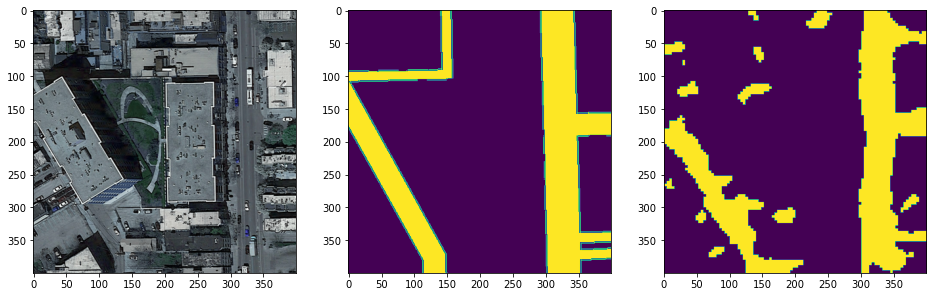

In [16]:
images, groundtruth = ds.images, ds.groundtruth
print(images.shape, groundtruth.shape)
visualize(images, groundtruth, [np.random.randint(0, len(images))])